**Keypoints** are points in an image that can be used to compare images and perform tasks such as image alignment and registration. These points can be automatically detected by using algorithms such as SIFT, SURF, and ORB.

Some of these algorithms can also define the desciptors to make key points really useful for image processing tasks.

## Harris Corner Detection

OpenCV has the function `cv.cornerHarris()` for this purpose. Its arguments are:

- img - Input image. It should be grayscale and float32 type.
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of the Sobel derivative used.
- k - Harris detector free parameter in the equation.

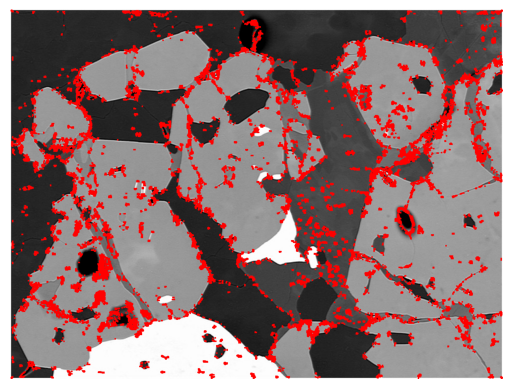

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('BSE_Image.jpg')

# Convert the image to grayscale. The Harris corner detection requires a single channel image.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to float32 for better precision in corner detection
gray_img = np.float32(gray_img)

"""
The parameters are:
- gray_img: the input grayscale image
- 2: the size of the neighborhood considered for corner detection
- 3: the Sobel derivative parameter
- 0.04: the Harris detector free parameter
"""
harris = cv2.cornerHarris(gray_img, 2, 3, 0.04)

# Dilate the result to mark the corners more visibly. This step is for visualization purposes.
harris = cv2.dilate(harris, None)

"""
Threshold for an optimal value to identify strong corners.
The threshold is set to 1% of the maximum value in the Harris result.
Mark detected corners in the original image with a red color ([0, 0, 255] in BGR format)
"""
img[harris > 0.00001 * harris.max()] = [0, 0, 255]

# Display the result using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
plt.axis('off')
plt.show()


OpenCV reads images in BGR (Blue, Green, Red) format by default. Matplotlib expects images in RGB (Red, Green, Blue) format for correct color representation.
If you don't convert the image, the colors will appear incorrect when displayed with matplotlib. The conversion ensures that colors are shown accurately.

So, for accurate color visualization, you should include the conversion step.

**NOTE**:
Experiment with different values for the Harris corner detection parameters:

- Block Size (blockSize): This defines the size of the neighborhood considered for corner detection. Try different values (e.g., 3, 5) to see how it affects detection.

- Sobel Parameter (ksize): This is the size of the Sobel kernel used for gradient calculations. Try 3 or 5 to see if it improves the results.

- Harris Detector Free Parameter (k): This parameter influences the sensitivity of corner detection. You’ve used 0.04, which is typical, but you might try values like 0.02 or 0.06 for comparison.

## Shi-Tomasi Corner Detector & Good Features to Track

OpenCV has a function, cv.goodFeaturesToTrack(). It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

With all this information, the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corner, throws away all the nearby corners in the range of minimum distance and returns N strongest corners.

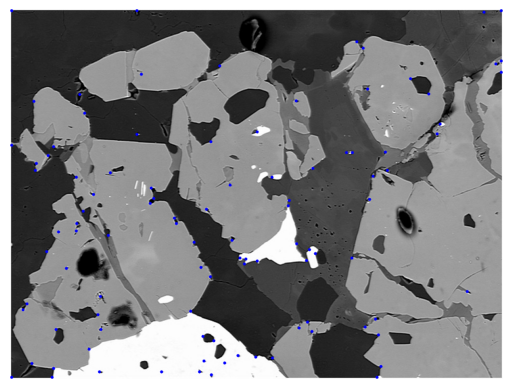

(<matplotlib.image.AxesImage at 0x7ec3500d75e0>,
 (-0.5, 999.5, 750.5, -0.5),
 None)

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the file 'BSE_Image.jpg'
img = cv2.imread('BSE_Image.jpg')

# Convert the image to grayscale. Corner detection generally requires a single channel image.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

"""
Apply Shi-Tomasi Corner Detection
Parameters:
- gray_img: Input grayscale image
- 100: Maximum number of corners to return
- 0.01: Quality level, which is a threshold for the corner quality. Corners with quality above this are considered
- 10: Minimum distance between detected corners to avoid multiple detections in close proximity
"""
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)

# Convert the corners to integer coordinates
# Loop through each detected corner
corners = np.array(corners, dtype=np.intp)

# Draw circles on the detected corners
for corner in corners:
    x, y = corner.ravel()  # Flatten the corner coordinates
    # Draw a small circle at the corner location
    cv2.circle(img, (x, y), 3, 255, -1)  # (x, y): center of the circle, 3: radius, 255: color (white), -1: filled circle


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()

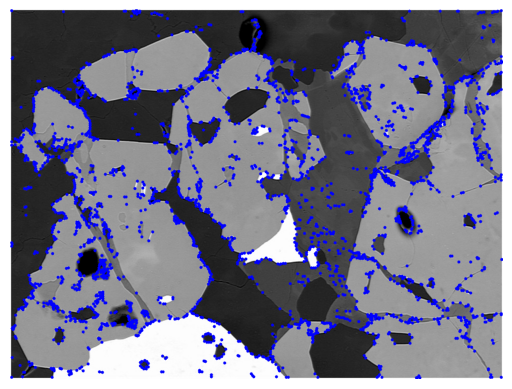

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('BSE_Image.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, 10000, 0.01, 1)

corners = np.asarray(corners, dtype=np.intp)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()

**NOTE**: Experiment with different values for the Shi-Tomasi corner detection parameters:

- Max Corners (maxCorners): This defines the maximum number of corners to return. Experiment with different values (e.g., 50, 100, 200) to see how it affects the detection of corners. Increasing this number may detect more corners, while a lower number will focus on fewer but potentially more significant corners.

- Quality Level (qualityLevel): This parameter is used to filter corners based on their quality measure. Try different values (e.g., 0.01, 0.02, 0.05) to adjust the sensitivity. A lower value will detect more corners, including less significant ones, while a higher value will detect fewer but more robust corners.

- Minimum Distance (minDistance): This specifies the minimum distance between detected corners. Adjust this value (e.g., 5, 10, 15) to control how close the detected corners can be to each other. Increasing this distance will reduce the number of closely spaced corners, while a smaller distance may result in more densely packed corners.

## SIFT (Scale-Invariant Feature Transform)

`sift.detect()` function finds the keypoint in the images. You can pass a mask if you want to search only a part of image. Each keypoint is a special structure which has many attributes like its (x,y) coordinates, size of the meaningful neighbourhood, angle which specifies its orientation, response that specifies strength of keypoints etc.

OpenCV also provides `cv2.drawKeyPoints()` function which draws the small circles on the locations of keypoints. If you pass a flag, `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` to it, it will draw a circle with size of keypoint and it will even show its orientation.

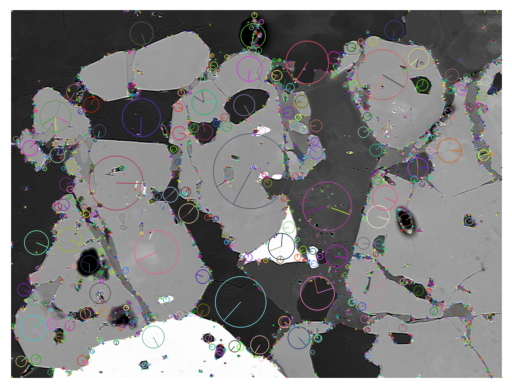

In [44]:
import numpy as np
import cv2

img = cv2.imread('BSE_Image.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray_img, None)

img = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()

Now to calculate the descriptor, OpenCV provides two methods.

1. Since you already found keypoints, you can call `sift.compute()` which computes the descriptors from the keypoints we have found. Eg: kp,des = sift.compute(gray_img,kp)
2. If you didn't find keypoints, directly find keypoints and descriptors in a single step with the function, `sift.detectAndCompute()`.

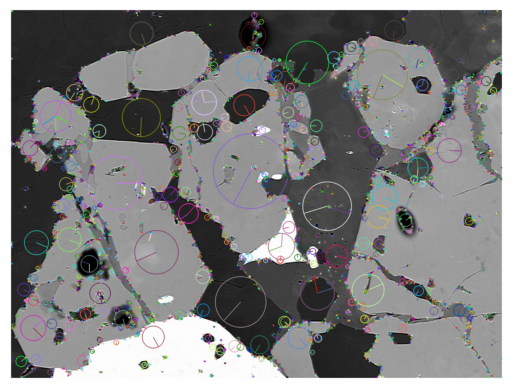

In [45]:
import numpy as np
import cv2

img = cv2.imread('BSE_Image.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None) # Here kp will be a list of keypoints and des is a numpy array of shape (Number of Keypoints)×128.

img = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()

## SURF (Speeded-Up Robust Features)

OpenCV provides SURF functionalities just like SIFT. You initiate a SURF object with some optional conditions like 64/128-dim descriptors, Upright/Normal SURF etc. Then as we did in SIFT, we can use `SURF.detect()`, `SURF.compute()` etc for finding keypoints and descriptors.

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('BSE_Image.jpg', cv2.IMREAD_GRAYSCALE)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img, None)

len(kp)

error: OpenCV(4.10.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


**Why this error?**
- SURF is patended, and due to licensing restrictions, it's not included in the default OpenCV builds.
- To use SURF, you must compile OPENCV with the `OPENCV_ENABLE_NONFREE` option enabled. This involves downloading the OpenCV source code and OpenCV Contrib modules, then compiling them.

## FAST Algorithm for Corner Detection

It is several times faster than other existing corner detectors.

But it is not robust to high levels of noise. It is dependent on a threshold.

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 5761
Total Keypoints without nonmaxSuppression: 30153


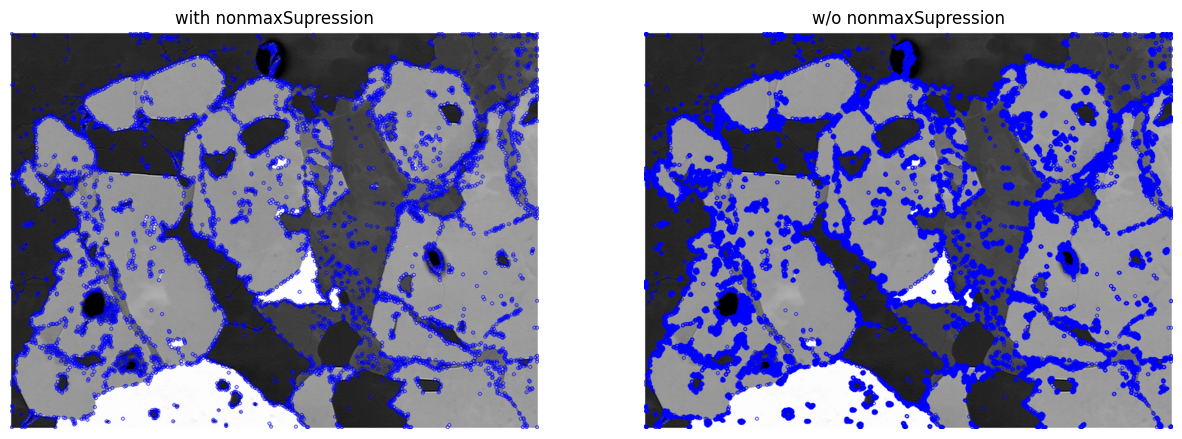

In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('BSE_Image.jpg', cv2.IMREAD_GRAYSCALE)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)); plt.title('with nonmaxSupression') ;plt.axis('off')

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)); plt.title('w/o nonmaxSupression'); plt.axis('off'); plt.show()

**NOTE**: Experiment with different values for the FAST feature detector parameters:

- **Threshold (`fast.setThreshold()`)**: This defines the intensity difference threshold between the central pixel and the surrounding pixels. Experiment with different values (e.g., 10, 20, 50) to see how it affects keypoint detection. A higher threshold makes the algorithm more selective, resulting in fewer keypoints, while a lower threshold detects more keypoints, including less significant ones.

- Non-Maximum Suppression (`fast.setNonmaxSuppression()`): This parameter controls whether to apply non-maximum suppression, which filters out weaker keypoints near stronger ones. Try enabling (`1`) and disabling (`0`) non-maximum suppression to observe its impact. Enabling it reduces the number of keypoints by keeping only the strongest ones, while disabling it allows more keypoints to be detected.

- Neighborhood Type (`fast.setType()`): This defines the pattern used for corner detection. Experiment with the two types available: `cv2.FAST_FEATURE_DETECTOR_TYPE_9_16` and `cv2.FAST_FEATURE_DETECTOR_TYPE_7_12`. The 9-16 neighborhood is more selective and detects fewer but stronger keypoints, while the 7-12 neighborhood detects more, but potentially weaker, keypoints.

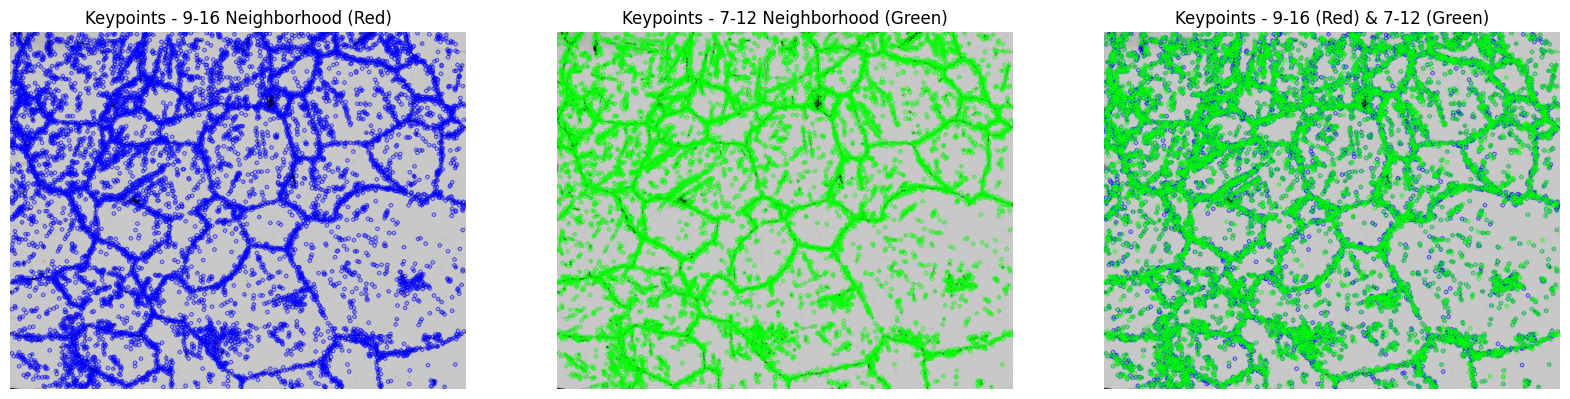

Total Keypoints with 9-16 Neighborhood: 9528
Total Keypoints with 7-12 Neighborhood: 10104


In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('grains.jpg', cv2.IMREAD_GRAYSCALE)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# Set to 9-16 type
fast.setType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)

# Detect keypoints using 9-16 Neighborhood
kp_9_16 = fast.detect(img, None)

# Set to 7-12 type
fast.setType(cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

# Detect keypoints using 7-12 Neighborhood
kp_7_12 = fast.detect(img, None)

# Create copies of the original image for displaying different keypoints
img_9_16 = np.copy(img)
img_7_12 = np.copy(img)
img_both = np.copy(img)

# Draw keypoints for 9-16 Neighborhood in red
img_9_16 = cv2.drawKeypoints(img_9_16, kp_9_16, None, color=(255, 0, 0))

# Draw keypoints for 7-12 Neighborhood in green
img_7_12 = cv2.drawKeypoints(img_7_12, kp_7_12, None, color=(0, 255, 0))

# Draw both sets of keypoints on the same image to highlight differences
img_both = cv2.drawKeypoints(img_both, kp_9_16, None, color=(255, 0, 0))  # Red for 9-16
img_both = cv2.drawKeypoints(img_both, kp_7_12, None, color=(0, 255, 0))  # Green for 7-12

# Display results
plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_9_16, cv2.COLOR_BGR2RGB))
plt.title('Keypoints - 9-16 Neighborhood (Red)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_7_12, cv2.COLOR_BGR2RGB))
plt.title('Keypoints - 7-12 Neighborhood (Green)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_both, cv2.COLOR_BGR2RGB))
plt.title('Keypoints - 9-16 (Red) & 7-12 (Green)')
plt.axis('off')

plt.show()

# Print the number of keypoints for both
print("Total Keypoints with 9-16 Neighborhood: {}".format(len(kp_9_16)))
print("Total Keypoints with 7-12 Neighborhood: {}".format(len(kp_7_12)))

## BRIEF in OpenCV

Below code shows the computation in BRIEF descriptors with help of CenSurE detector.

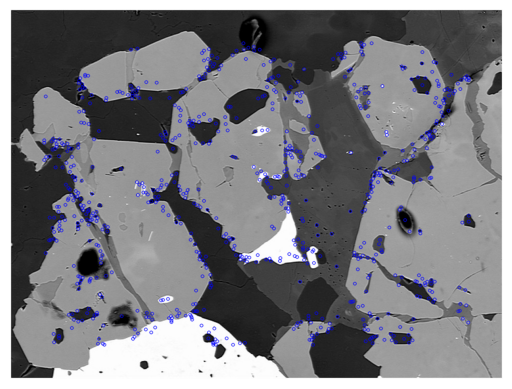

Descriptor Size: 32
Descriptors Shape: (740, 32)


In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv2.imread('BSE_Image.jpg', cv2.IMREAD_GRAYSCALE)

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Find the keypoints with STAR
kp = star.detect(img, None)

# Compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

# Draw the keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))

# Display the image with keypoints using matplotlib
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print descriptor size and shape of descriptors
print("Descriptor Size:", brief.descriptorSize())
print("Descriptors Shape:", des.shape)


## ORB in OpenCV

As usual, we have to create an ORB object with the function, `cv2.ORB()` or using feature2d common interface. It has a number of optional parameters. Most useful ones are nFeatures which denotes maximum number of features to be retained (by default 500), scoreType which denotes whether Harris score or FAST score to rank the features (by default, Harris score) etc. Another parameter, WTA_K decides number of points that produce each element of the oriented BRIEF descriptor. By default it is two, ie selects two points at a time. In that case, for matching, NORM_HAMMING distance is used. If WTA_K is 3 or 4, which takes 3 or 4 points to produce BRIEF descriptor, then matching distance is defined by NORM_HAMMING2.

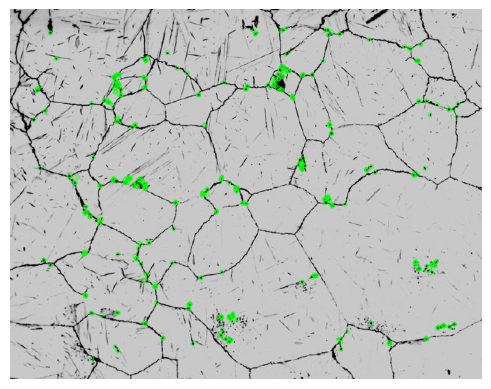

In [85]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('grains.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2); plt.axis('off'); plt.show()